<a href="https://colab.research.google.com/github/ohazem1/Data-Science-Projects/blob/main/Clustering_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Omar  Hazem Wagdy

ID: 49-0581

Tutorial: T5

---

Name: Ahmed Tarek Youssef

ID: 49-4345

Tutorial: T5

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/music_genres.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


# Data Inspection and understanding


In [40]:
# Getting a Statistical description of the dataset
df.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [41]:
# Discovering the dataset more to understand each datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [42]:
# Checking for null values in the dataset
df.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [43]:
# Checking for null values in the dataset
df.isnull().any().any()

False

In [44]:
# understanding more the 'mode' column 
df['mode'].tail()

2968    1
2969    0
2970    1
2971    0
2972    1
Name: mode, dtype: int64

In [45]:
# understanding more the 'mode' column 
df['mode'].value_counts()

1    2477
0     496
Name: mode, dtype: int64

In [46]:
# understanding more the 'genres' column 
df['genres'].tail()

2968            zolo
2969         zouglou
2970            zouk
2971    zurich indie
2972          zydeco
Name: genres, dtype: object

In [47]:
# understanding more the 'genres' column 
df['genres'].value_counts()

21st century classical    1
north carolina roots      1
nordic soundtrack         1
norman ok indie           1
norsk lovsang             1
                         ..
ethio-jazz                1
ethiopian pop             1
ethnomusicology           1
ethnotronica              1
zydeco                    1
Name: genres, Length: 2973, dtype: int64

In [48]:
# checking for the unique values 
df['genres'].unique()

array(['21st century classical', '432hz', '8-bit', ..., 'zouk',
       'zurich indie', 'zydeco'], dtype=object)

In [49]:
# we suspected the '[]' value in a column so we needed to count its occurence in the 'genres' 
df['genres'].value_counts()['[]']

1

# Data Cleaning and Preprocessing 

In [50]:
#Dropping or Removing '[]' as it is only one row and its not important for the business case and it cant be imputed 
df['genres']=df['genres'].replace("[]",np.NaN)
df=df.dropna()
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


In [51]:
# Changing the datatype of the 'duration_ms' to integer to return it to its normal form 
df['duration_ms'] = df['duration_ms'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2972 non-null   int64  
 1   genres            2972 non-null   object 
 2   acousticness      2972 non-null   float64
 3   danceability      2972 non-null   float64
 4   duration_ms       2972 non-null   int64  
 5   energy            2972 non-null   float64
 6   instrumentalness  2972 non-null   float64
 7   liveness          2972 non-null   float64
 8   loudness          2972 non-null   float64
 9   speechiness       2972 non-null   float64
 10  tempo             2972 non-null   float64
 11  valence           2972 non-null   float64
 12  popularity        2972 non-null   float64
 13  key               2972 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 348.3+ KB


<ipython-input-51-92fd4bb32fcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_ms'] = df['duration_ms'].astype(int)


In [52]:
df['duration_ms'].head()

0     160297
1    1048887
2     115177
4     190628
5     343196
Name: duration_ms, dtype: int64

# Exploratory Data Analysis


**Q1: What are the 5 most popular music genres?**

In [72]:
# First Approach: we will make a copy of the orginal dataframe, & drop all the columns in the copy dataframe except the 'genres' and 'popularity'.
dfpop = df.copy()
dfpop.drop('mode', inplace=True, axis=1)
dfpop.drop('acousticness', inplace=True, axis=1)
dfpop.drop('danceability', inplace=True, axis=1)
dfpop.drop('duration_ms', inplace=True, axis=1)
dfpop.drop('energy', inplace=True, axis=1)
dfpop.drop('instrumentalness', inplace=True, axis=1)
dfpop.drop('liveness', inplace=True, axis=1)
dfpop.drop('loudness', inplace=True, axis=1)
dfpop.drop('speechiness', inplace=True, axis=1)
dfpop.drop('tempo', inplace=True, axis=1)
dfpop.drop('key', inplace=True, axis=1)
dfpop.drop('valence', inplace=True, axis=1)
dfpop.head()

,genres,popularity
0,21st century classical,27.833333
1,432hz,52.500000
2,8-bit,48.000000
4,a cappella,45.820071
5,abstract,43.500000


In [73]:
# First Approach: we will sort the copy of the datafram in descending order of popularity 
dfpop = dfpop.sort_values(by=['popularity'], ascending=False)

In [74]:
# First Approach: we will use .head to view the top 5 popular genres 
dfpop.head()

,genres,popularity
237,basshall,80.666667
2533,south african house,80.000000
2755,trap venezolano,80.000000
2778,turkish edm,80.000000
536,chinese electropop,78.500000


In [75]:
# Second Approach: Different approach but same result for extra validation 
df.nlargest(5, ['popularity'])

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.818,169799,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2533,1,south african house,0.043833,0.847,311854,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.877,231848,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2778,0,turkish edm,0.008290,0.698,186700,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
46,0,alberta hip hop,0.330000,0.885,144000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11


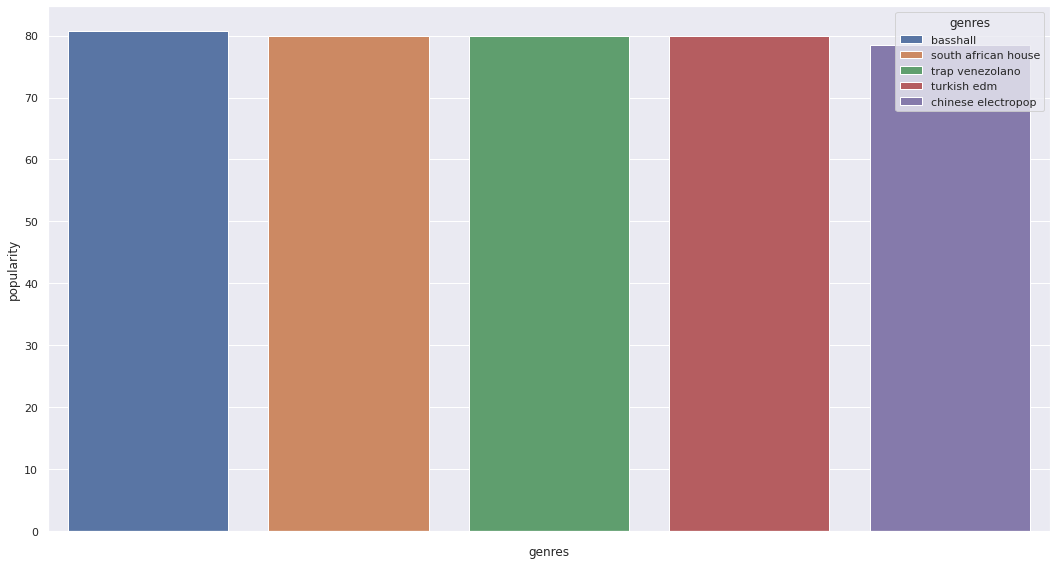

In [76]:
# Third Approach: for visualisation using bar plot
sns.set(rc={'figure.figsize':(16,9)})

g = df.groupby('genres', as_index=False)['popularity'].sum().sort_values(by='popularity', ascending=False).head(5)
sns.barplot(data=g, x='genres', y='popularity', hue='genres', dodge=False).set(xticklabels=[]);

**Answere For Q1:** we decided to take a copy of the orginal dataframe. we will drop all the columns in the copy data frame except the genres and the popularity. then we will sort the coppied dataframe descendingly for popularity and use head() to get the top 5 most popular genres. and they are basshall with popularity equals to 80.666667, followed by the south african house 80.000000,followed by trap venezolano 80.000000, followed by turkish edm 80.000000, followed by chinese electropop	78.500000.

**Q2: What factors affect the Popularity of the song ? (Mention the biggest 2 factors, with interpretation)**


In [77]:
# label encoding for 'genres' as its datatype is object so we can use the corr function to get the correlation 
from sklearn import preprocessing

dfcorr = df.copy()
label_encoder = preprocessing.LabelEncoder()
dfcorr['genres']= label_encoder.fit_transform(dfcorr['genres'])
dfcorr.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0,0.979333,0.162883,160297,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,1,0.494780,0.299333,1048887,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,2,0.762000,0.712000,115177,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
4,1,3,0.676557,0.538961,190628,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,4,0.459210,0.516167,343196,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


In [78]:
# calculating the correlation 
corr = dfcorr.corr()
corr

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
mode,1.000000,-0.003399,0.077240,-0.071234,-0.053170,-0.080268,-0.012659,-0.002692,-0.063660,-0.059175,-0.042880,-0.010274,-0.031067,-0.060159
genres,-0.003399,1.000000,-0.027543,0.037516,-0.010504,0.030540,-0.055652,0.035881,0.062098,0.015371,-0.012068,0.042190,0.005473,0.004074
acousticness,0.077240,-0.027543,1.000000,-0.325010,-0.014024,-0.868257,0.273774,-0.076653,-0.737279,-0.086229,-0.397669,-0.178256,-0.458546,-0.078907
danceability,-0.071234,0.037516,-0.325010,1.000000,-0.160638,0.299788,-0.383103,-0.055143,0.453064,0.242061,0.082864,0.652549,0.218019,0.029557
duration_ms,-0.053170,-0.010504,-0.014024,-0.160638,1.000000,-0.048202,0.229421,0.018643,-0.137600,0.033247,-0.046865,-0.257512,-0.071111,-0.029289
energy,-0.080268,0.030540,-0.868257,0.299788,-0.048202,1.000000,-0.324964,0.168303,0.848966,0.119862,0.430789,0.305207,0.337657,0.097237
instrumentalness,-0.012659,-0.055652,0.273774,-0.383103,0.229421,-0.324964,1.000000,-0.050614,-0.537682,-0.196764,-0.201670,-0.424091,-0.265516,-0.069315
liveness,-0.002692,0.035881,-0.076653,-0.055143,0.018643,0.168303,-0.050614,1.000000,0.123981,0.190112,0.002318,0.000720,-0.094092,0.007279
loudness,-0.063660,0.062098,-0.737279,0.453064,-0.137600,0.848966,-0.537682,0.123981,1.000000,0.095334,0.407962,0.376596,0.344315,0.083029
speechiness,-0.059175,0.015371,-0.086229,0.242061,0.033247,0.119862,-0.196764,0.190112,0.095334,1.000000,0.001482,0.092671,-0.045112,0.022294


In [79]:
#sorting the corelation results descendingly for a better view and understanding 
corr['popularity'].sort_values(ascending=False, key=lambda x: x.abs())

popularity          1.000000
acousticness       -0.458546
loudness            0.344315
energy              0.337657
instrumentalness   -0.265516
danceability        0.218019
tempo               0.146617
liveness           -0.094092
duration_ms        -0.071111
speechiness        -0.045112
mode               -0.031067
valence             0.023117
key                 0.008700
genres              0.005473
Name: popularity, dtype: float64

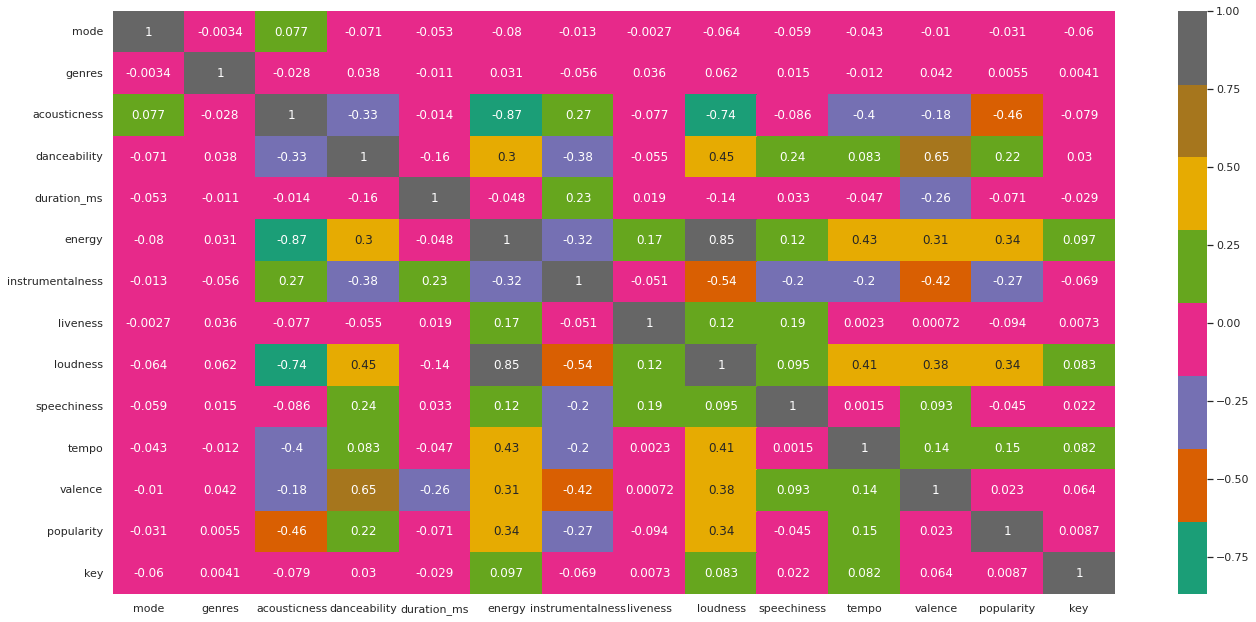

In [80]:
# visualising the correlation using heat map
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='Dark2', annot = True)

**Answer for Q2:** to get the most factors that affect popularity we calculated the corelation and the factor that has the highest degree of correlation is the factor that affects the popularity the most. thus the highest factor that affects popularity is acousticness with a correlation degree of 0.45 but negatively affected so when acousticness decreases the popularity will increase . the second most factor is the loudness with a degree of correlation 0.344315 but positively affected so when the loudness increase the popularity  increase.

**Q3: Which genre has the highest energy and which has the lowest?**

In [81]:
# we will make a copy of the orginal dataframe. drop all the columns in the copy dataframe except the genres and energy.
dfenergy = df.copy()
dfenergy.drop('mode', inplace=True, axis=1)
dfenergy.drop('acousticness', inplace=True, axis=1)
dfenergy.drop('danceability', inplace=True, axis=1)
dfenergy.drop('duration_ms', inplace=True, axis=1)
dfenergy.drop('popularity', inplace=True, axis=1)
dfenergy.drop('instrumentalness', inplace=True, axis=1)
dfenergy.drop('liveness', inplace=True, axis=1)
dfenergy.drop('loudness', inplace=True, axis=1)
dfenergy.drop('speechiness', inplace=True, axis=1)
dfenergy.drop('tempo', inplace=True, axis=1)
dfenergy.drop('key', inplace=True, axis=1)
dfenergy.drop('valence', inplace=True, axis=1)
dfenergy.head()

,genres,energy
0,21st century classical,0.071317
1,432hz,0.450678
2,8-bit,0.818000
4,a cappella,0.316434
5,abstract,0.442417


In [82]:
# we will sort the copy pf the datafram in descending order of popularity 
dfenergy = dfenergy.sort_values(by=['energy'], ascending=False)

In [83]:
# Getting the highest energy genres 
dfenergy.head()

,genres,energy
175,australian ska,0.994667
2706,tennessee metal,0.994333
1897,nederlandse hardstyle,0.994000
348,brazilian ska,0.991000
913,dutch death metal,0.989000


In [84]:
# Getting the Lowest energy genres 
dfenergy.tail()

,genres,energy
1723,medieval,0.004440
2476,singing bowl,0.004130
1611,korean classical piano,0.003950
328,brain waves,0.001002
283,binaural,0.001002


In [85]:
# Different approach but same result for extra validation for the higest energy genres 
df.nlargest(5, ['energy'])

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
175,0,australian ska,0.000096,0.312667,211724,0.994667,0.000183,0.1561,-4.356,0.158667,148.061,0.228900,43.333333,9
2706,1,tennessee metal,0.000891,0.372000,264013,0.994333,0.040620,0.1780,-4.621,0.192667,122.180,0.105967,46.000000,11
1897,0,nederlandse hardstyle,0.076200,0.341000,237818,0.994000,0.000000,0.3520,0.060,0.374000,157.607,0.220000,0.000000,1
348,0,brazilian ska,0.500000,0.320000,172176,0.991000,0.000004,0.2260,-7.047,0.220000,167.532,0.545000,13.000000,9
913,1,dutch death metal,0.000040,0.306000,279093,0.989000,0.000410,0.2700,-5.087,0.109000,103.006,0.134000,38.000000,2


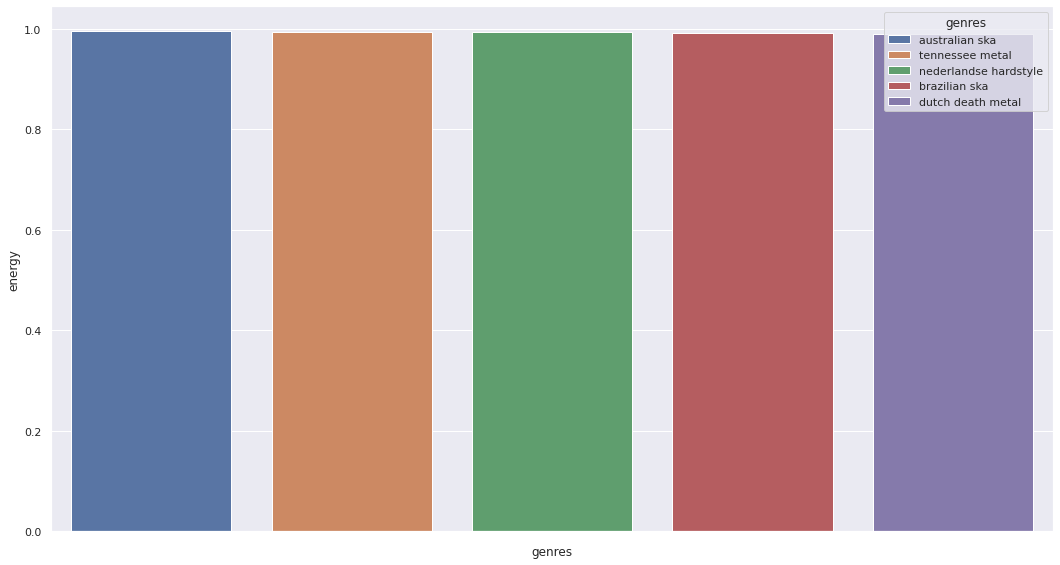

In [86]:
# for visualisation using bar plot for the highest energy genres 
sns.set(rc={'figure.figsize':(16,9)})

g = df.groupby('genres', as_index=False)['energy'].sum().sort_values(by='energy', ascending=False).head(5)
sns.barplot(data=g, x='genres', y='energy', hue='genres', dodge=False).set(xticklabels=[]);

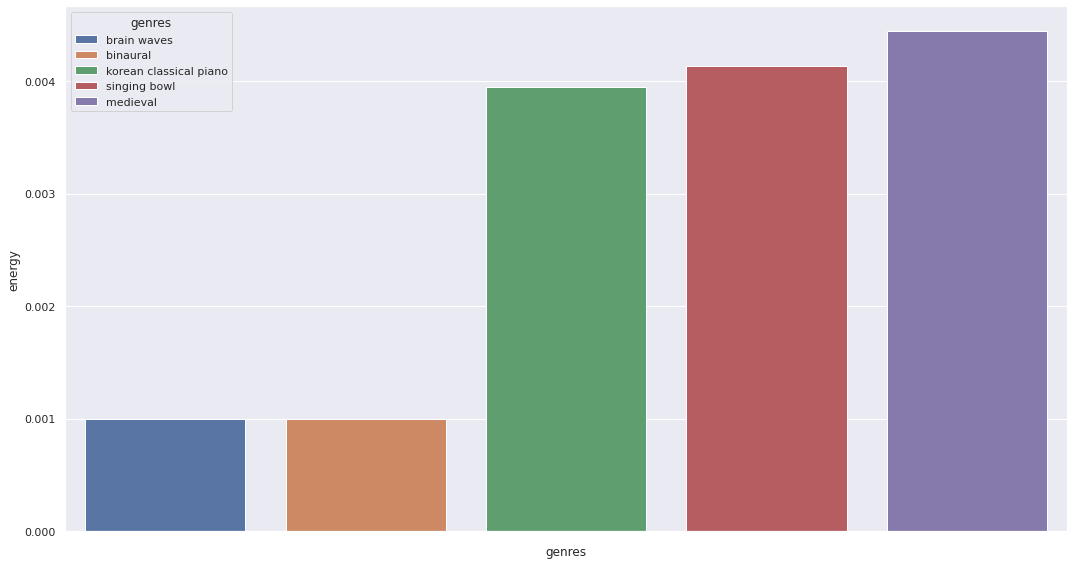

In [87]:
# for visualisation using bar plot for the lowest energy genres 
sns.set(rc={'figure.figsize':(16,9)})

g = df.groupby('genres', as_index=False)['energy'].sum().sort_values(by='energy', ascending=True).head(5)
sns.barplot(data=g, x='genres', y='energy', hue='genres', dodge=False).set(xticklabels=[]);

**Answere for Q3:** we took a copy of the dataframe and sorted it. we droped ever column except the genres and energy. 
 The genre with highest energy is australian ska = 0.994667.
 The genre with the lowest energy is brain waves = 0.001002 & binaural	0.001002

**Q4: What are the most correlated pairs of attributes ?**

In [88]:
# label encoding for 'genres' as its datatype is object so we can use the corr function to get the correlation 
from sklearn import preprocessing

dfcorr2 = df.copy()
label_encoder = preprocessing.LabelEncoder()
dfcorr2['genres']= label_encoder.fit_transform(dfcorr['genres'])
dfcorr2.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0,0.979333,0.162883,160297,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,1,0.494780,0.299333,1048887,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,2,0.762000,0.712000,115177,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
4,1,3,0.676557,0.538961,190628,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,4,0.459210,0.516167,343196,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


In [89]:
# calculating the correlation 
corr2 = dfcorr2.corr()
corr2

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
mode,1.000000,-0.003399,0.077240,-0.071234,-0.053170,-0.080268,-0.012659,-0.002692,-0.063660,-0.059175,-0.042880,-0.010274,-0.031067,-0.060159
genres,-0.003399,1.000000,-0.027543,0.037516,-0.010504,0.030540,-0.055652,0.035881,0.062098,0.015371,-0.012068,0.042190,0.005473,0.004074
acousticness,0.077240,-0.027543,1.000000,-0.325010,-0.014024,-0.868257,0.273774,-0.076653,-0.737279,-0.086229,-0.397669,-0.178256,-0.458546,-0.078907
danceability,-0.071234,0.037516,-0.325010,1.000000,-0.160638,0.299788,-0.383103,-0.055143,0.453064,0.242061,0.082864,0.652549,0.218019,0.029557
duration_ms,-0.053170,-0.010504,-0.014024,-0.160638,1.000000,-0.048202,0.229421,0.018643,-0.137600,0.033247,-0.046865,-0.257512,-0.071111,-0.029289
energy,-0.080268,0.030540,-0.868257,0.299788,-0.048202,1.000000,-0.324964,0.168303,0.848966,0.119862,0.430789,0.305207,0.337657,0.097237
instrumentalness,-0.012659,-0.055652,0.273774,-0.383103,0.229421,-0.324964,1.000000,-0.050614,-0.537682,-0.196764,-0.201670,-0.424091,-0.265516,-0.069315
liveness,-0.002692,0.035881,-0.076653,-0.055143,0.018643,0.168303,-0.050614,1.000000,0.123981,0.190112,0.002318,0.000720,-0.094092,0.007279
loudness,-0.063660,0.062098,-0.737279,0.453064,-0.137600,0.848966,-0.537682,0.123981,1.000000,0.095334,0.407962,0.376596,0.344315,0.083029
speechiness,-0.059175,0.015371,-0.086229,0.242061,0.033247,0.119862,-0.196764,0.190112,0.095334,1.000000,0.001482,0.092671,-0.045112,0.022294


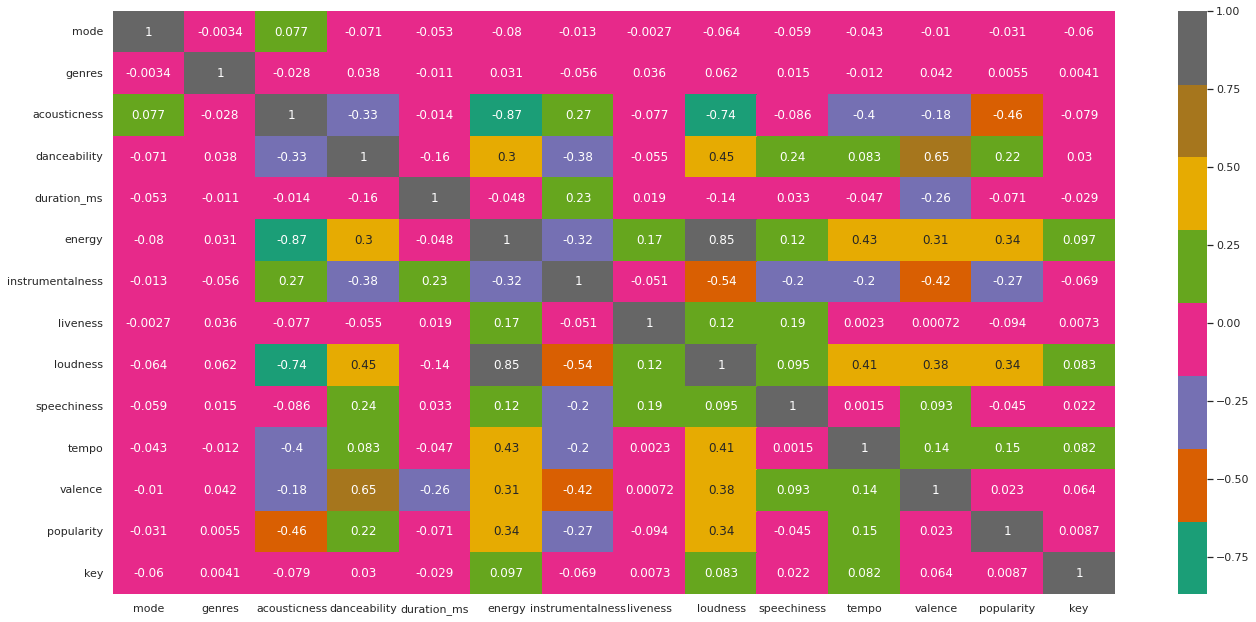

In [90]:
# visualising the correlation using heat map
plt.figure(figsize=(20,10))
sns.heatmap(corr2, cmap='Dark2', annot = True)

**Answere for Q4:** The First Most correlated Pair according to the heat map is the Loudness and Energy with a strong positive correlation degree of 0.85 (high degree of correlation) this means when the Loudness Increase the Energy will Increase. The Second Most correlated Pair is danceability and valence according to the heat map they have a  strong positive correlation with a degree of 0.65 this means when danceability increases the valence will increase 

# Data Preparation for Modelling

In [91]:
# since K-means is senstive to outliers we will apply Z-Score Normalization for all the numeric columns only 
from sklearn.preprocessing import StandardScaler 


dfnorm = df[['mode','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','popularity','key']].copy()
scaled_data = StandardScaler().fit_transform(dfnorm)

scaled_data

array([[ 0.44757469,  1.80834218, -2.48432022, ..., -1.92725355,
        -0.72213868,  0.01828198],
       [ 0.44757469,  0.2928222 , -1.57868449, ..., -1.34273793,
         0.75093152, -0.2786254 ],
       [ 0.44757469,  1.12859655,  1.16023582, ...,  2.38955698,
         0.48219574,  0.31518936],
       ...,
       [ 0.44757469, -0.43129108,  1.405072  , ...,  1.64191432,
         0.40257032, -0.2786254 ],
       [-2.23426397,  1.85108692,  1.1182007 , ...,  1.22019541,
        -2.38431924,  0.31518936],
       [ 0.44757469,  0.06218354,  0.61206723, ...,  1.56477877,
        -0.57710667,  0.31518936]])

# Applying the Model

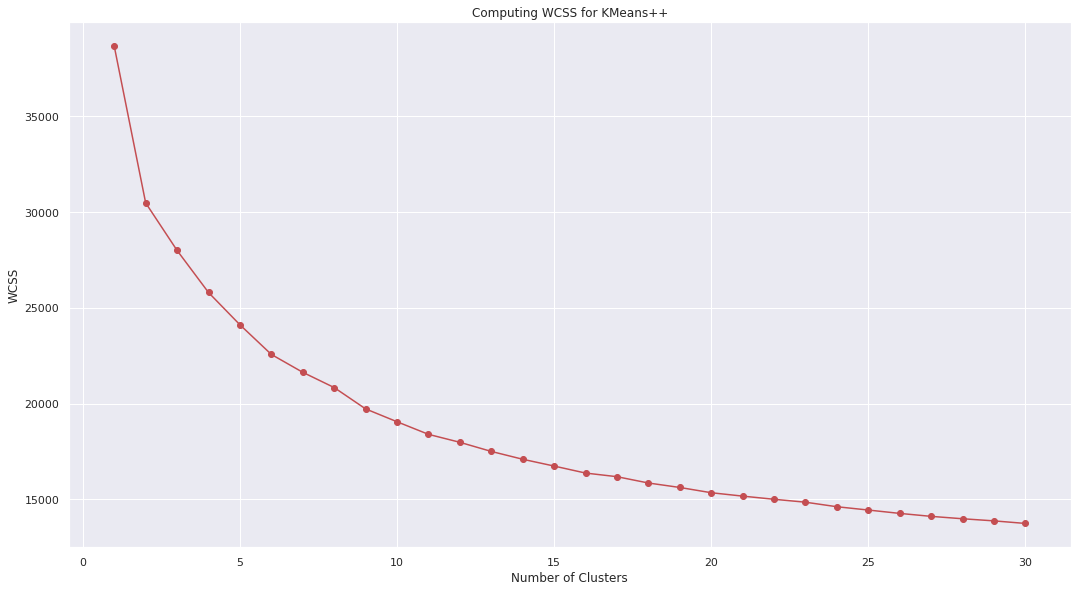

In [92]:
# Using the elbow method to get the number of clusters 
from sklearn.cluster import KMeans


wcss = []
for k in range( 1, 31 ):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit_predict(scaled_data)
    wcss.append( kmeans.inertia_ )
    
plt.plot(range(1, 31), wcss, 'o-r', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [96]:
# After Viewing the Elbow Method Graph Above we decided to choose the number of clusters = 13 as we think it is the breaking point 
kmeans = KMeans(n_clusters=13, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)


df["cluster"] = cluster_labels
cluster_labels

array([12,  6,  9, ...,  9,  2,  9], dtype=int32)

# Cluster Interpretation

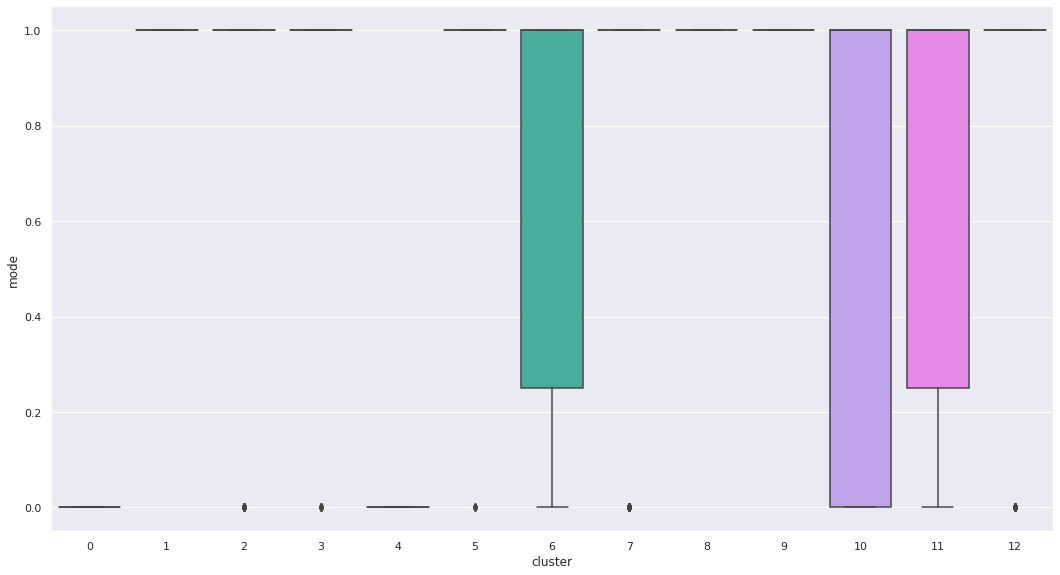

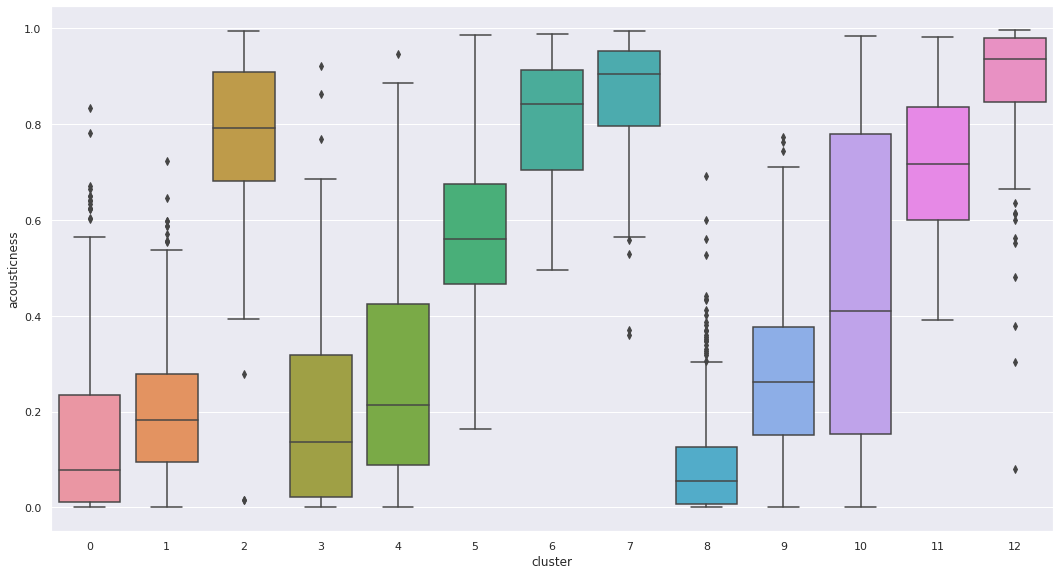

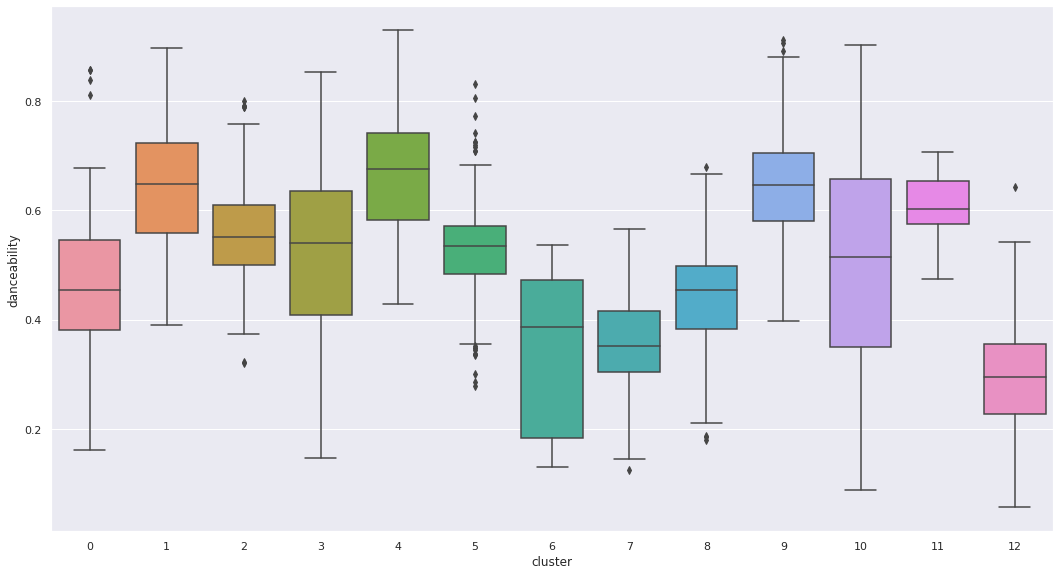

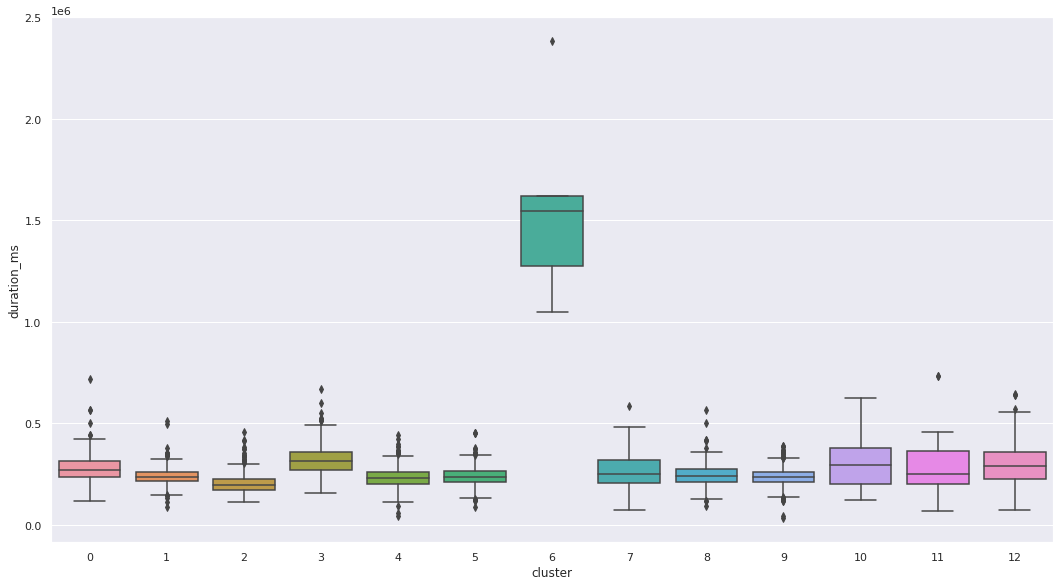

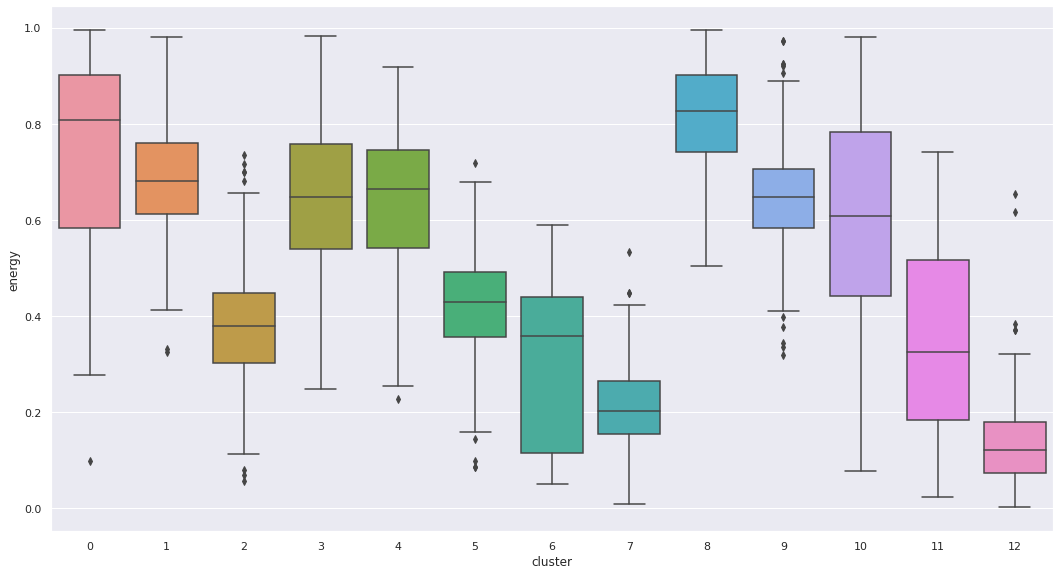

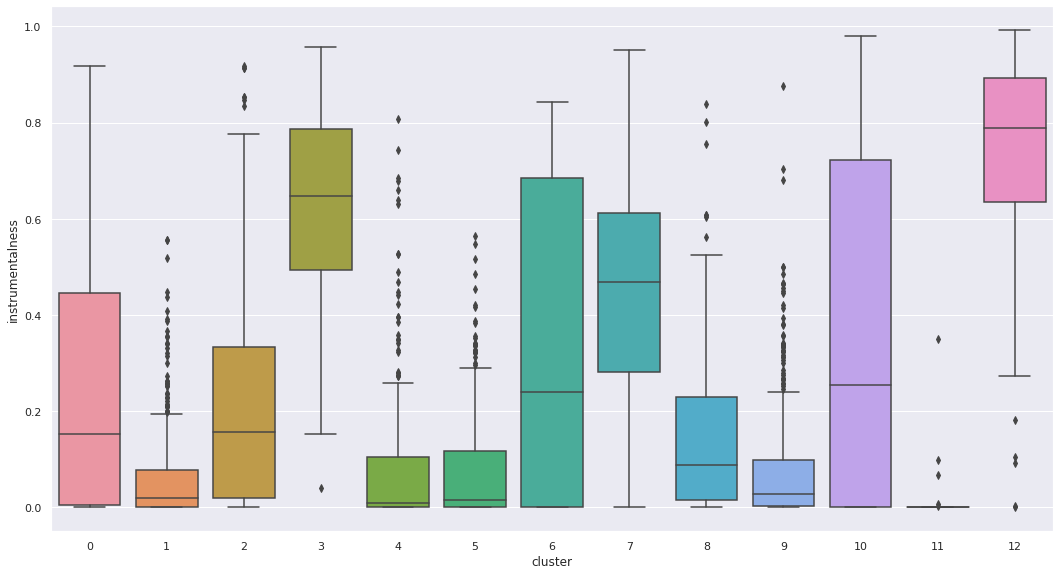

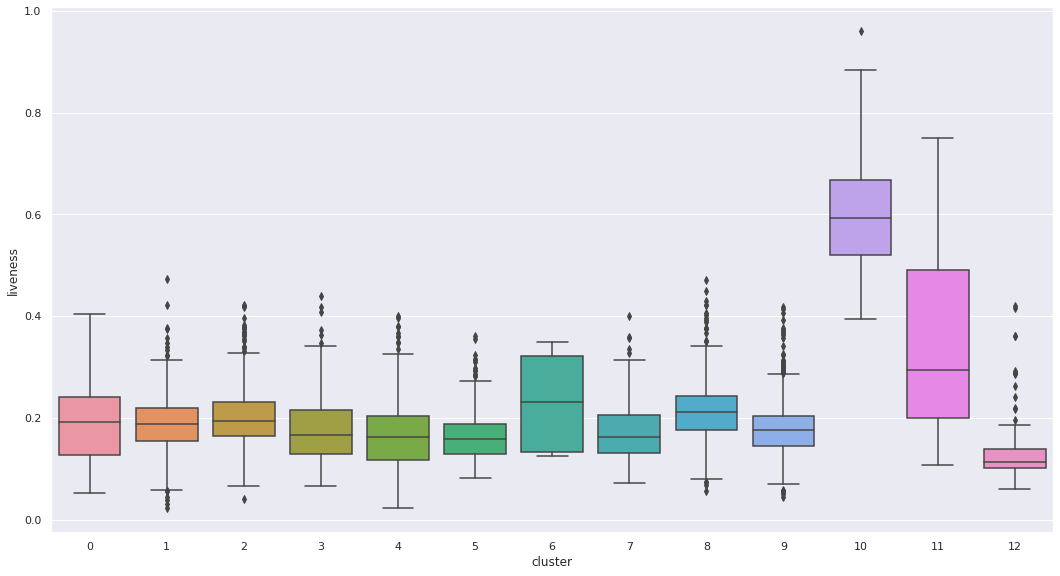

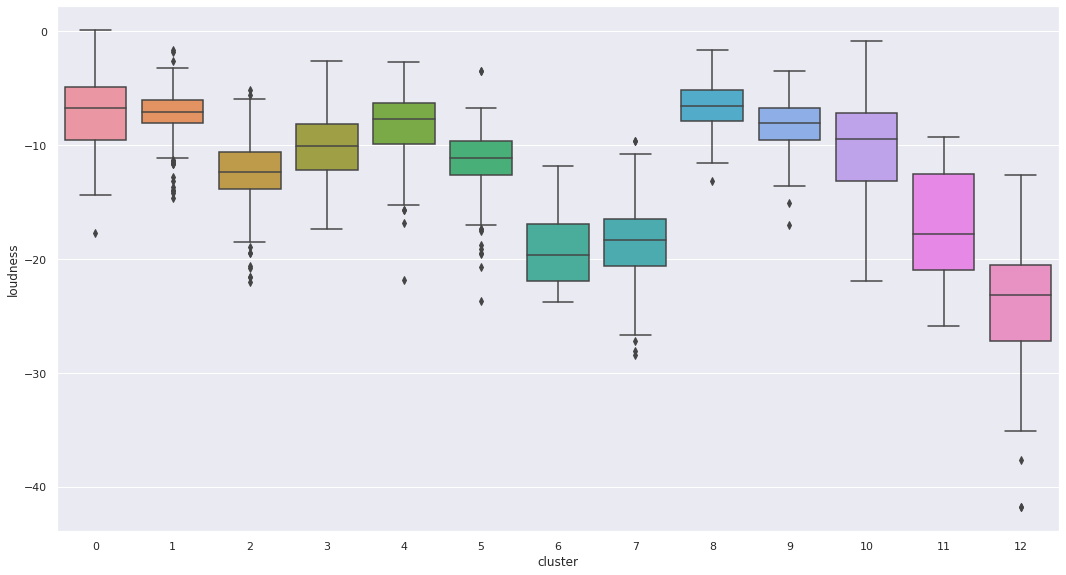

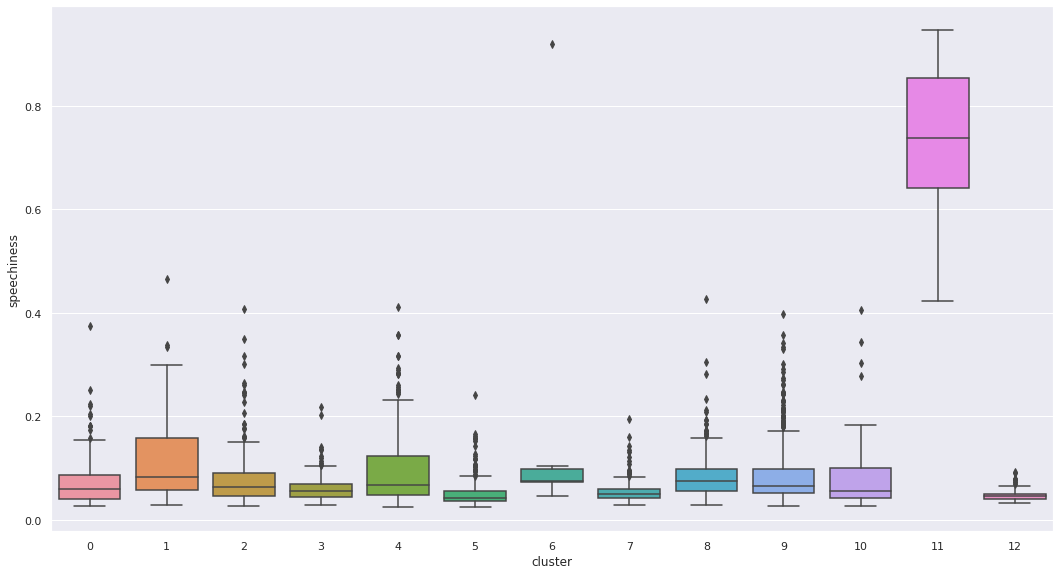

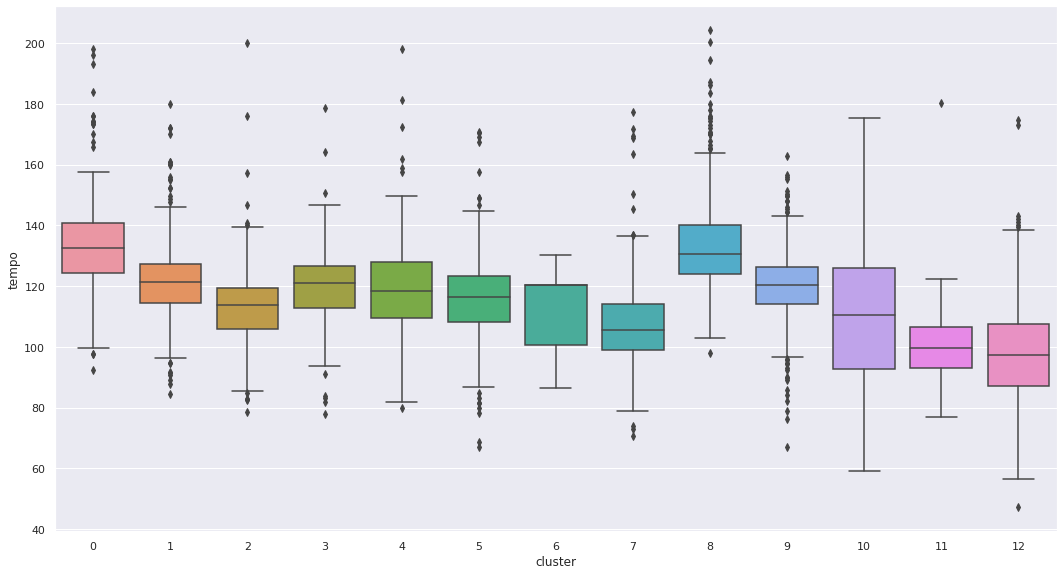

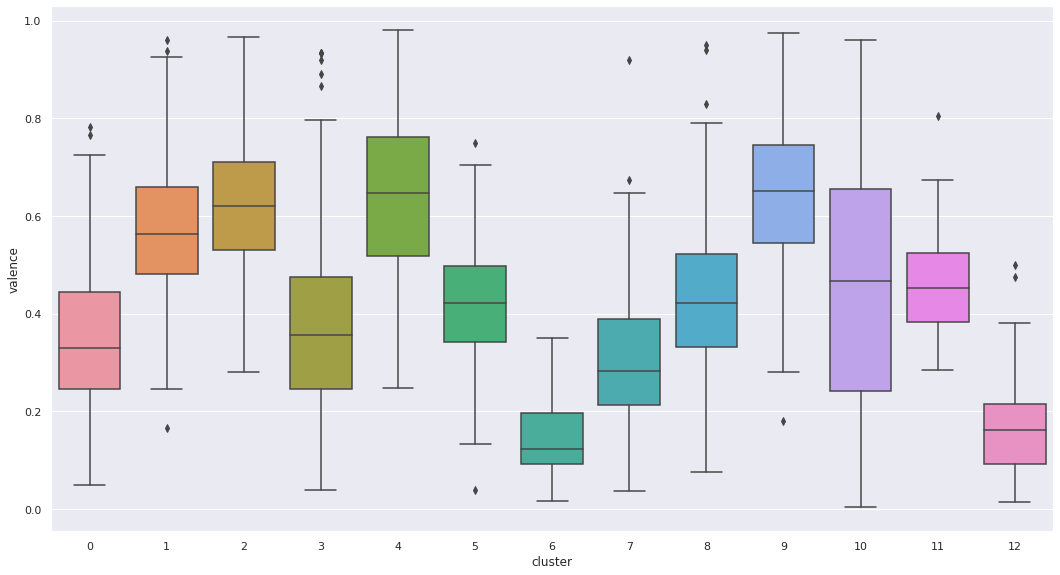

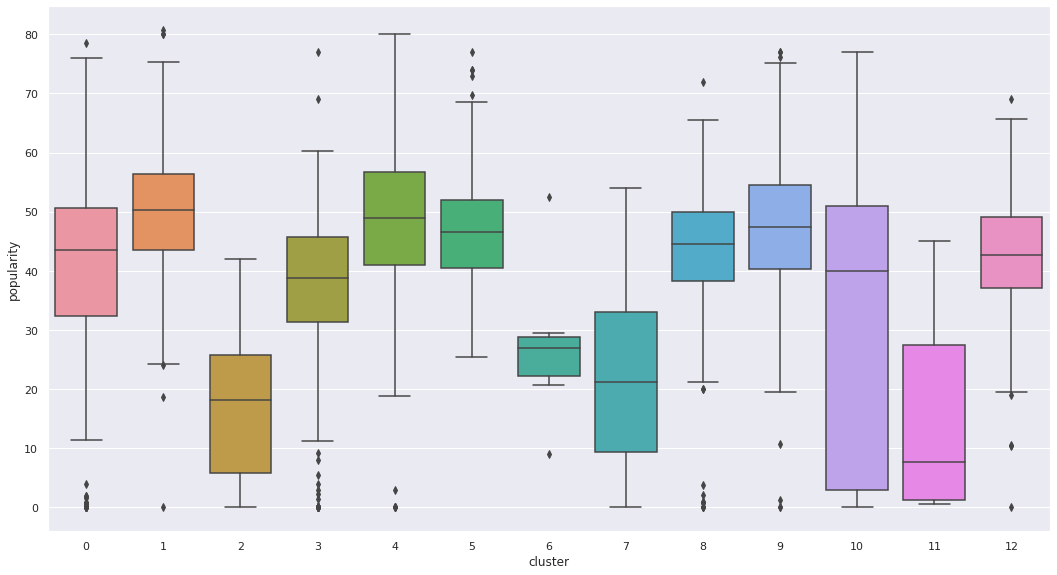

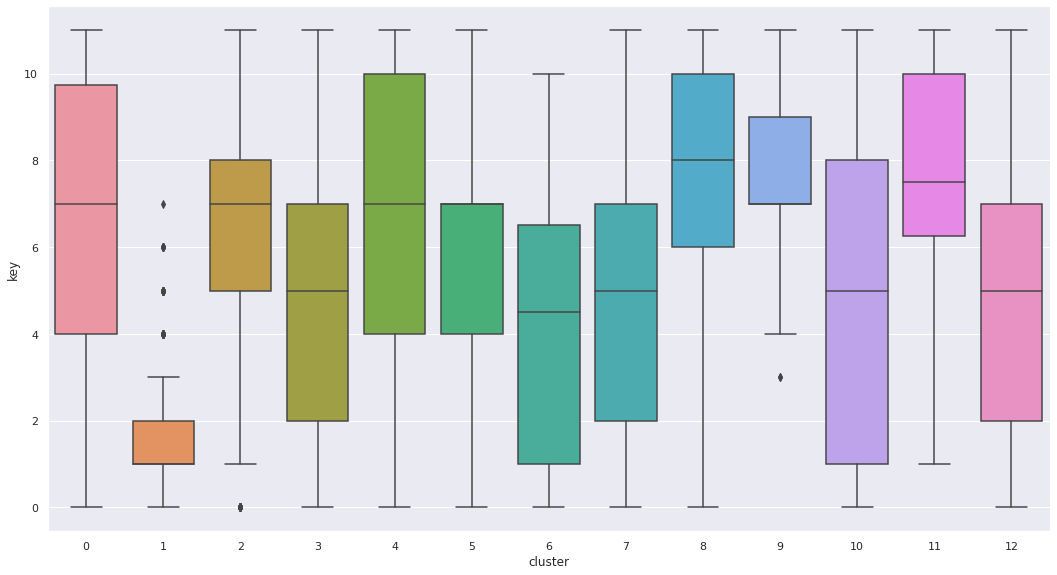

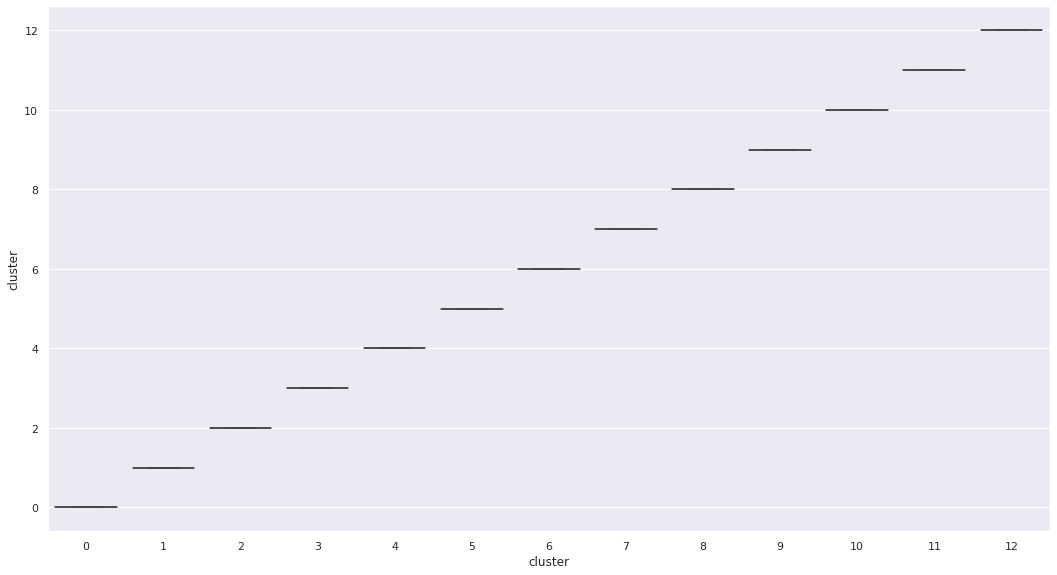

In [97]:
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(x='cluster', y=col, data=df)

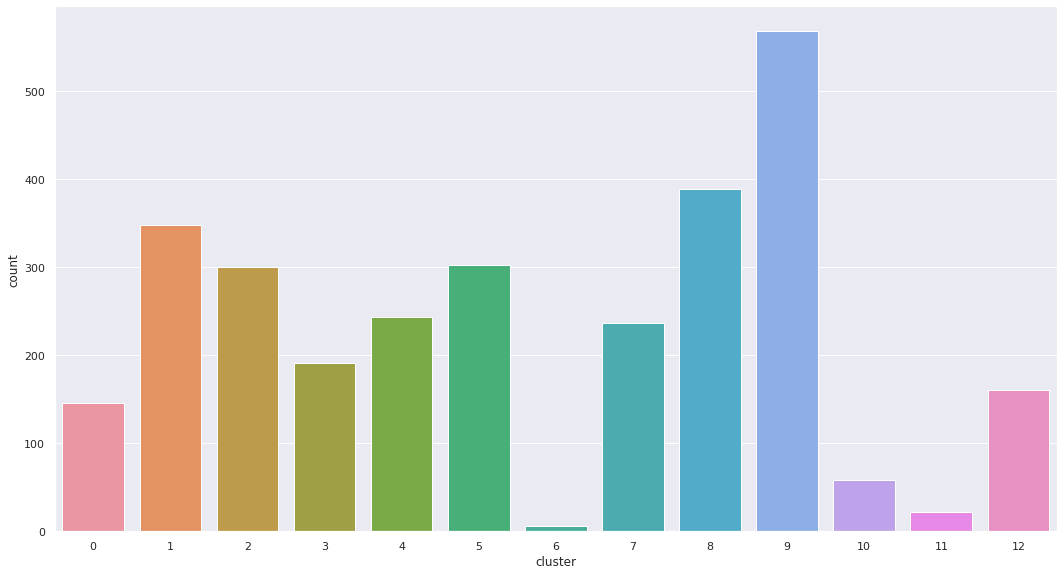

In [98]:
# Visually plotting how many points belong to each cluster 
sns.countplot(x='cluster', data=df)

In [99]:
# getting a statistical description of the clusters 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df.groupby('cluster').describe()

mode                                               acousticness  \
         count      mean       std  min   25%  50%  75%  max        count   
cluster                                                                     
0        146.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0        146.0   
1        348.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0        348.0   
2        300.0  0.943333  0.231591  0.0  1.00  1.0  1.0  1.0        300.0   
3        191.0  0.952880  0.212453  0.0  1.00  1.0  1.0  1.0        191.0   
4        244.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0        244.0   
5        303.0  0.983498  0.127605  0.0  1.00  1.0  1.0  1.0        303.0   
6          6.0  0.666667  0.516398  0.0  0.25  1.0  1.0  1.0          6.0   
7        237.0  0.886076  0.318391  0.0  1.00  1.0  1.0  1.0        237.0   
8        389.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0        389.0   
9        568.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0        568.0   
10        58.0  0.724138  0.450851  0.0  0.00  1.0  1.0  1.0         58.0   
11        22.0  0.727273  0.455842  0.0  0.25  1.0  1.0  1.0         22.0   
12       160.0  0.850000  0.358193  0.0  1.00  1.0  1.0  1.0        160.0   

                                                                               \
             mean       std       min       25%       50%       75%       max   
cluster                                                                         
0        0.167650  0.208644  0.000003  0.011109  0.077175  0.234532  0.834167   
1        0.203533  0.139233  0.000251  0.094178  0.181873  0.277833  0.722158   
2        0.778762  0.155491  0.016350  0.681144  0.791208  0.908070  0.994400   
3        0.196190  0.197126  0.000005  0.022426  0.137005  0.318482  0.921500   
4        0.281168  0.231696  0.000293  0.088465  0.214764  0.424765  0.945500   
5        0.570584  0.163871  0.163250  0.465625  0.559500  0.675000  0.987000   
6        0.793797  0.183685  0.494780  0.704000  0.843000  0.913000  0.988000   
7        0.864052  0.119630  0.359525  0.795822  0.904000  0.953615  0.995000   
8        0.092717  0.110635  0.000003  0.008224  0.056183  0.127188  0.691000   
9        0.273158  0.155596  0.000305  0.151845  0.262417  0.376741  0.773000   
10       0.451823  0.342615  0.000027  0.153000  0.409350  0.780000  0.983083   
11       0.700840  0.178376  0.391992  0.600651  0.716645  0.835793  0.981500   
12       0.887191  0.140129  0.080664  0.845997  0.937047  0.980391  0.996000   

        danceability                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0              146.0  0.463878  0.130451  0.161000  0.380346  0.453700   
1              348.0  0.641149  0.103358  0.390500  0.559102  0.648645   
2              300.0  0.554889  0.084123  0.321333  0.499176  0.550846   
3              191.0  0.527490  0.160567  0.147083  0.408970  0.539800   
4              244.0  0.670132  0.105857  0.428567  0.582631  0.675950   
5              303.0  0.527765  0.081835  0.278000  0.484046  0.534289   
6                6.0  0.342936  0.177653  0.130033  0.183771  0.386167   
7              237.0  0.359628  0.085326  0.125000  0.304585  0.352059   
8              389.0  0.441636  0.090146  0.181000  0.382972  0.454455   
9              568.0  0.645718  0.082237  0.397000  0.581036  0.646194   
10              58.0  0.495325  0.200988  0.088180  0.351000  0.514717   
11              22.0  0.608907  0.056935  0.474000  0.574402  0.602278   
12             160.0  0.294139  0.103216  0.056900  0.227367  0.295000   

                          duration_ms                                          \
              75%     max       count          mean            std        min   
cluster                                                                         
0        0.545154  0.8570       146.0  2.824073e+05 

In [100]:
df.groupby('cluster').describe(include='object')

genres                                    
         count unique                     top freq
cluster                                           
0          146    146             action rock    1
1          348    348        abstract hip hop    1
2          300    300               accordion    1
3          191    191                abstract    1
4          244    244               accordeon    1
5          303    303              a cappella    1
6            6      6                   432hz    1
7          237    237              acousmatic    1
8          389    389               adoracion    1
9          568    568                   8-bit    1
10          58     58          arabic hip hop    1
11          22     22             beat poetry    1
12         160    160  21st century classical    1

# Interpretation 

Our Model consists of 13 Clusters 


*   Generally Cluster 9 has the most number of points, cluster 8 comes next and cluster 6 has the least number of points

*   for the mode cluster 6, 10 & 11 have then highest mode also these clusters have wide distribution 


*   for the acousticness clusters 2,7 and 12 have the highest acousticness while 10 has wide distribution  

*   in the danceability cluster 4 have the highest danceability while cluster 10 comes next 


*   for the duration cliuster 6 have the highest duration while the rest are much lower 

*   for the energy cluster 0 and cluster 8 have the highest energy then 10 comes next, also cluster 12 have the least energy 


* for the inustrmentalnes clusters 12 is the highest then 10 comes next while clusters 10 and 6 have wide distribution  

*   for the liveness cluster 10 is the highestthen comes cluster 11 while cluster 12 is the lowest

* for the loudness cluster 0 is the highest while cluster 12 is the lowest 

* for the speechiness cluser 11 is the highest also cluster has verry narrow distribution 12

* for the tempo cluster 10 have the highest tempo 

* for the valance 4 have the highest distribution while 10 have a wide distribution 

* for the popularity cluster 4 have the highest popularity  

* for the key all the cluster are equal  






